# Módulo 03 - Sesión 06 - Retos

In [1]:
import requests
import time
import pandas as pd
import numpy as np


## Reto 01 Petición a API de la NASA

In [2]:
api_key = "MUCwZXRcDemNv2OAHfZ7tUe8TIqniEAKyISJ7LYd"

In [3]:
url = 'https://api.nasa.gov/neo/rest/v1/neo/browse/'

In [4]:
parametros = {'api_key': api_key}

In [5]:
# tu código para la petición
datos = requests.get(url, params=parametros)

In [6]:
datos

<Response [200]>

In [7]:
datos_p100 = datos.json()

In [8]:
objetos_p100 = datos_p100['near_earth_objects']

In [9]:
objetos_p100_df = pd.json_normalize(objetos_p100)

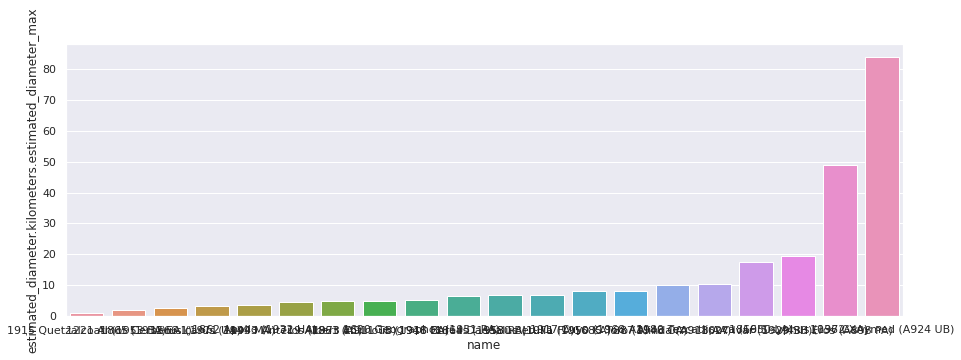

In [10]:
def visualizar_diametros(objetos):
    
    import seaborn as sns
    
    sns.set(rc={'figure.figsize':(15,5)})
    sizes = objetos[['name', 'estimated_diameter.kilometers.estimated_diameter_max']].copy()
    sizes.sort_values('estimated_diameter.kilometers.estimated_diameter_max', ascending=True, inplace=True)
    g = sns.barplot(x=sizes['name'], y=sizes['estimated_diameter.kilometers.estimated_diameter_max'])
    
visualizar_diametros(objetos_p100_df)

---
##Reto 02 Potencias de 2 con if's y for's

In [11]:
def potencia_de_dos(exponente):
    
    # validar si el exponente es negativo
    if exponente < 0:
      return None
    # validar si el exponente es 0
    elif exponente == 0:
      return 1
    # Si ya es mayor que 0 entonces calcular la
    # potencia con el for.
    else:
      resultado = 2
      for number in range(exponente-1): 
        resultado = 2 * resultado
            
    return resultado

In [12]:
def revisar_potencia_de_dos(potencia_de_dos):
    
    import numpy as np
    error = False
    
    if potencia_de_dos(0) != np.power(2, 0):
        print(f'Error computando 2^0 ... Resultado esperado: {np.power(2, 0)} - Resultado obtenido {potencia_de_dos(0)}')
        error = True
    
    if potencia_de_dos(2) != np.power(2, 2):
        print(f'Error computando 2^2 ... Resultado esperado: {np.power(2, 2)} - Resultado obtenido {potencia_de_dos(2)}')
        error = True
    
    if potencia_de_dos(8) != np.power(2, 8):
        print(f'Error computando 2^8 ... Resultado esperado: {np.power(2, 8)} - Resultado obtenido {potencia_de_dos(8)}')
        error = True
    
    if potencia_de_dos(16) != np.power(2, 16):
        print(f'Error computando 2^16 ... Resultado esperado: {np.power(2, 16)} - Resultado obtenido {potencia_de_dos(16)}')
        error = True
    
    if potencia_de_dos(-16) != None:
        print(f'Error computando 2^-16 ... Resultado esperado: {None} - Resultado obtenido {potencia_de_dos(16)}')
        error = True
    
    if potencia_de_dos(56) != np.power(2, 56):
        print(f'Error computando 2^256 ... Resultado esperado: {np.power(2, 256)} - Resultado obtenido {potencia_de_dos(256)}')
        error = True
        
    if not error:
        print(f'La funcion es correcta!')

revisar_potencia_de_dos(potencia_de_dos)

La funcion es correcta!


---
##Reto 03 Evitando errores al automatizar

In [13]:
def str_a_float(lista_de_strings):
    lista_de_floats = []
    # 1. recorrer la lista de string (for)
    # 2. para cada valor convertirlo a float
    # 3. agregar el valor convertido a la nueva lista
    # 4. si hay falla entonces agregar el valor np.nan
    for i in lista_de_strings:
      try:
        lista_de_floats.append(float(i))
      except ValueError:
        lista_de_floats.append(np.nan)    
    return lista_de_floats

In [14]:
strings = ['1', '2', '3', '4', '5',
    '1.2', '33', '55.5', 'f', '78',
    'f', 'g', 't', 'e', 'r', 'f',
    '4.4', 't', '6.6', 'r', '9.9']

floats = str_a_float(strings)
floats

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.2,
 33.0,
 55.5,
 nan,
 78.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 4.4,
 nan,
 6.6,
 nan,
 9.9]

---
##Reto 05 Sumando ventas por producto

In [15]:
productos = ["Pokemaster", "Cegatron", "Pikame Mucho",
    "Lazarillo de Tormes", "Stevie Wonder", "Needle",
    "El AyMeDuele", "El Desretinador", "Sacamel Ojocles",
    "Desojado", "Maribel Buenas Noches", "Cíclope",
    "El Cuatro Ojos"]

ventas_enero = [3, 5, 4, 45, 2, 32, 7, 89, 7, 6, 24, 51, 12]
ventas_febrero = [7, 9, 0, 76, 4, 34, 1, 2, 34, 67, 8, 9, 0]
ventas_marzo = [1, 1, 3, 56, 7, 98, 2, 34, 1, 0, 23, 1, 12]
ventas_abril = [2, 34, 2, 1, 56, 78, 23, 3, 4, 23, 1, 78, 9]
ventas_mayo = [1, 2, 32, 4, 32, 1, 45, 67, 87, 8, 9, 45, 2]
ventas_junio = [1, 2, 32, 1, 45, 78, 8, 90, 0, 98, 7, 46, 15]
ventas_julio = [15, 62, 37, 85, 5, 8, 9, 0, 75, 36, 52, 15, 12]
ventas_agosto = [1, 2, 32, 4, 35, 6, 78, 43, 45, 12, 34, 67, 89]
ventas_septiembre = [9, 87, 7, 6, 56, 7, 0, 34, 23, 1, 2, 51, 35]
ventas_octubre = [16, 62, 75, 58, 97, 6, 9, 0, 98, 78, 2, 3, 4]
ventas_noviembre = [1, 3, 2, 1, 4, 5, 2, 4, 7, 8, 4, 3, 5]
ventas_diciembre = [7, 9, 0, 6, 3, 7, 3, 85, 9, 7, 8, 0, 9]

1. Convierte las listas en `Series` de pandas.

In [16]:
dict = {'enero': ventas_enero, 'febrero': ventas_febrero, 'marzo': ventas_marzo,
        'abril': ventas_abril, 'mayo': ventas_mayo, 'junio': ventas_junio,
        'julio': ventas_julio, 'agosto': ventas_agosto, 'septiembre': ventas_septiembre,
        'octubre': ventas_octubre, 'noviembre': ventas_noviembre, 'diciembre': ventas_diciembre,}

2. Concatena horizontalmente las `Series` de ventas de manera que cada fila del `DataFrame` resultante corresponda al mismo producto.
3. En alguno de los pasos anteriores, agrega los nombres de los productos como índice.

In [17]:
ventas_dataframe = pd.DataFrame(dict, index=productos)

4. Crea una nueva columna llamada `total_por_producto` que contenga la suma horizontal de las ventas mensuales de cada producto (es decir, un resumen de las ventas del año por producto).

In [18]:
ventas_dataframe['total_por_producto'] = ventas_dataframe.sum(axis=1)

5. Agrega también una fila hasta el final que tenga como índice `total_por_mes` que contenga la suma vertical de las ventas de cada mes (la última celda va a ser la suma total de las ventas de todos los productos en todo el año).

In [19]:
ventas_dataframe = ventas_dataframe.append(ventas_dataframe.sum(numeric_only=True).rename('total_por_mes'))

Función de validación "revisar_dataframe"

Felicidades! El procedimiento fue realizado correctamente.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


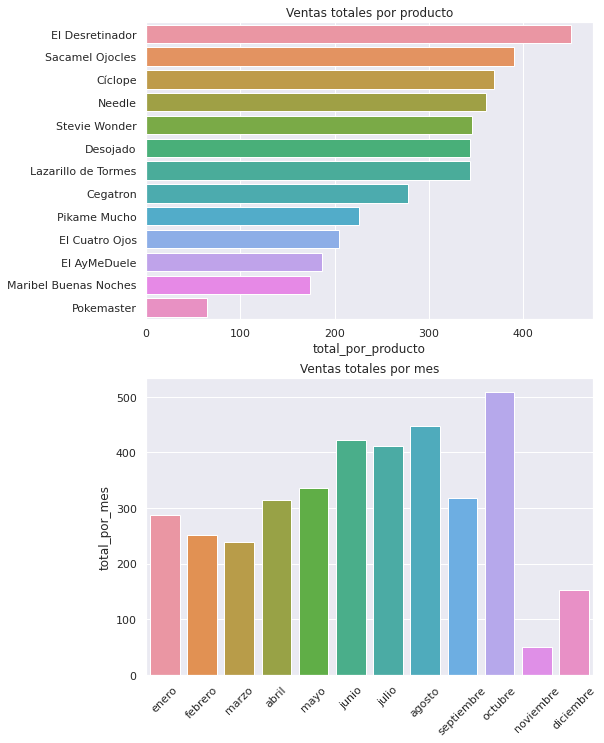

In [20]:
import base64
from pprint import pprint

def revisar_dataframe(ventas_dataframe, productos, ventas_enero, ventas_febrero, ventas_marzo, ventas_abril, ventas_mayo,
                      ventas_junio, ventas_julio, ventas_agosto, ventas_septiembre,
                      ventas_octubre, ventas_noviembre, ventas_diciembre):
    
    import pandas as pd
    
    data_1 = b'CmRlZiBjb25jYXRlbmFyX2xpc3Rhc19ob3Jpem9udGFsbWVudGUobGlzdGFfZGVfbGlzdGFzLCBpbmRpY2UpOgoKICAgIG1lc2VzID0gWydlbmVybycsICdmZWJyZXJvJywgJ21hcnpvJywgJ2FicmlsJywgJ21heW8nLCAnanVuaW8nLCAnanVsaW8nLCAnYWdvc3RvJywgJ3NlcHRpZW1icmUnLCAnb2N0dWJyZScsICdub3ZpZW1icmUnLAogICAgICAgICAgICAnZGljaWVtYnJlJ10KICAgIGxpc3RhX2RlX3NlcmllcyA9IFtdCiAgICBmb3IgaSBpbiByYW5nZShsZW4obGlzdGFfZGVfbGlzdGFzKSk6CiAgICAgICAgbGlzdGFfZGVfc2VyaWVzLmFwcGVuZChwZC5TZXJpZXMobGlzdGFfZGVfbGlzdGFzW2ldLCBpbmRleD1pbmRpY2UsIG5hbWU9bWVzZXNbaV0pKQogICAgZGF0YWZyYW1lID0gcGQuY29uY2F0KGxpc3RhX2RlX3NlcmllcywgYXhpcz0xKQogICAgcmV0dXJuIGRhdGFmcmFtZQo='
    
    eval(compile(base64.b64decode(data_1).decode("utf-8"), "", "exec"), globals())
    ventas_dataframe_2 = concatenar_listas_horizontalmente([ventas_enero, ventas_febrero, ventas_marzo, ventas_abril, ventas_mayo,
                                                      ventas_junio, ventas_julio, ventas_agosto, ventas_septiembre,
                                                      ventas_octubre, ventas_noviembre, ventas_diciembre], productos)
    ventas_dataframe_2['total_por_producto'] = ventas_dataframe_2.sum(axis=1)
    total_por_mes = ventas_dataframe_2.sum(axis=0)
    total_por_mes.name = 'total_por_mes'
    ventas_dataframe_2 = ventas_dataframe_2.append(total_por_mes)
    
    if ventas_dataframe.equals(ventas_dataframe_2):
        print(f'Felicidades! El procedimiento fue realizado correctamente.')
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        fig, axs = plt.subplots(2, 1, figsize=(8, 12))
        sin_total_por_mes = ventas_dataframe.drop(index='total_por_mes')
        sin_total_por_mes.sort_values('total_por_producto', ascending=False, inplace=True)
        axs[0].set_title('Ventas totales por producto')
        sns.barplot(sin_total_por_mes['total_por_producto'], sin_total_por_mes.index, ax=axs[0])
        
        axs[1].set_title('Ventas totales por mes')
        sin_total_por_producto = ventas_dataframe.drop(columns='total_por_producto')
        sns.barplot(sin_total_por_producto.columns, sin_total_por_producto.loc['total_por_mes'], orient='v', ax=axs[1])
        for item in axs[1].get_xticklabels():
            item.set_rotation(45)
        
    else:
        from IPython.display import display
        print(f'Hubo un error!\n')
        print('Dataframe esperado:')
        display(ventas_dataframe_2)
        print('\nDataframe recibido:')
        display(ventas_dataframe)
        
revisar_dataframe(ventas_dataframe, productos, ventas_enero, ventas_febrero, ventas_marzo, ventas_abril, ventas_mayo,
                      ventas_junio, ventas_julio, ventas_agosto, ventas_septiembre,
                      ventas_octubre, ventas_noviembre, ventas_diciembre)

---
##Reto 06 Automatizando peticiones

1. Revisa la documentación de la API de la NASA para entender cómo realizar peticiones por fecha.


In [21]:
start_date = '1995-01-01'
end_date = '1995-02-28'
neo_feed_url = 'https://api.nasa.gov/neo/rest/v1/feed/'

In [22]:
params = {'api_key': api_key, 'start_date': start_date}

2. Realiza una primera petición de prueba para entender el formato de los datos que obtienes de regreso (cómo extraemos los datos que necesitamos y qué estructura tienen).


In [23]:
#nasa_data = requests.get(neo_feed_url, params=params, timeout=5)

3. Escribe el código necesario para automatizar las peticiones a la API y obtener los meses de Enero y Febrero del año 1995.


In [24]:
# tu código para la petición
dict_datos = {}

for i in range(0, 9):
  try:
    time.sleep(5)
    nasa_data = requests.get(neo_feed_url, params=params, timeout=5)

    if nasa_data.status_code == 200:
      json = nasa_data.json()

      data = json['near_earth_objects']
      dict_datos[i] = data

      new_link = json['links']['next']
      neo_feed_url = new_link
  except:
    continue

4. Almacena los datos de cada petición y luego usa esos datos para crear `DataFrames`.


In [25]:
for key in dict_datos:
    normalized = pd.json_normalize(dict_datos[key])
    df = pd.DataFrame.from_dict(normalized)
    dict_datos[key] = df

In [26]:
lista_de_dataframes = []

for key in dict_datos:
    lista_de_dataframes.append(dict_datos[key])

5. Concatena verticalmente tus `DataFrames` para obtener un `DataFrame` final que contenga todos los datos de tus peticiones. Cada fila tiene que corresponder a un objeto espacial.


In [30]:
nasa_dataframe = pd.concat(lista_de_dataframes, axis=1).reset_index(drop=True)

In [33]:
nasa_dataframe

,1995-01-07,1995-01-08,1995-01-05,1995-01-06,1995-01-03,1995-01-04,1995-01-01,1995-01-02,1995-01-09,1995-01-08,1995-01-14,1995-01-15,1995-01-12,1995-01-13,1995-01-10,1995-01-11,1995-01-18,1995-01-19,1995-01-16,1995-01-17,1995-01-15,1995-01-21,1995-01-22,1995-01-20,1995-01-29,1995-01-27,1995-01-28,1995-01-25,1995-01-26,1995-01-23,1995-01-24,1995-01-22,1995-01-29,1995-02-04,1995-02-05,1995-02-02,1995-02-03,1995-02-01,1995-01-30,1995-01-31,1995-02-08,1995-02-09,1995-02-06,1995-02-07,1995-02-05,1995-02-11,1995-02-12,1995-02-10,1995-02-19,1995-02-17,1995-02-18,1995-02-15,1995-02-16,1995-02-13,1995-02-14,1995-02-12,1995-02-19,1995-02-26,1995-02-24,1995-02-25,1995-02-22,1995-02-23,1995-02-20,1995-02-21,1995-02-28,1995-02-26,1995-03-05,1995-02-27,1995-03-03,1995-03-04,1995-03-01,1995-03-02
0,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'links': {'self': 'http://www.neowsapp.com/r...,[{'li

6. Guarda tu `DataFrame` con el nombre de `near_earth_objects-january_february_1995-raw.csv`.

In [29]:
nasa_dataframe.to_csv('near_earth_objects-january_february_1995-raw.csv')